In [1332]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [1333]:
rent_data = pd.read_csv('House_Rent_Dataset.csv')
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [1334]:
# Check for duplicate rows
duplicate_rows = rent_data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Drop duplicate rows
#rent_data = rent_data.drop_duplicates()
#print(f"Number of rows after dropping duplicates: {rent_data.shape[0]}")

Number of duplicate rows: 0


In [1335]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [1336]:
rent_data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [1337]:
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## Pairplot of data

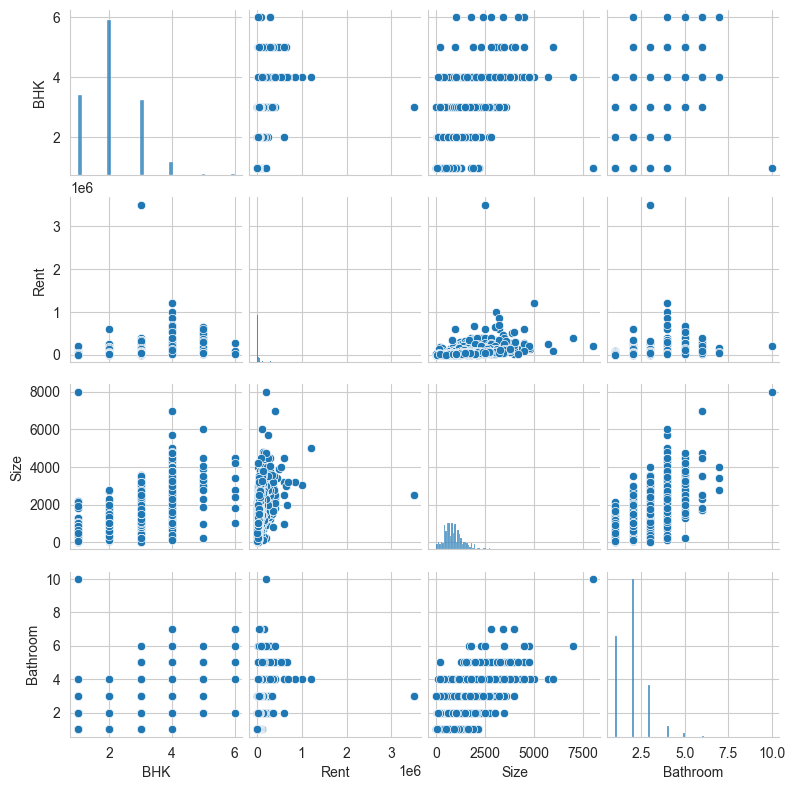

In [1338]:
sns.pairplot(rent_data,height=2)
plt.show()

Rent Price Sections

In [1339]:
fig = px.histogram(rent_data,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

From the above rent price , we can see that there is a outlier around 3.5m. In order to 

In [1340]:
print(np.where(rent_data['Rent']>2000000))

(array([1837]),)


### Deleting the Outlier

In [1341]:
rent_data = rent_data[rent_data['Rent'] <= 2000000]

In [1342]:
fig = px.histogram(rent_data,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

### BHK

In [1343]:
rent_data['BHK'].value_counts()

BHK
2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: count, dtype: int64

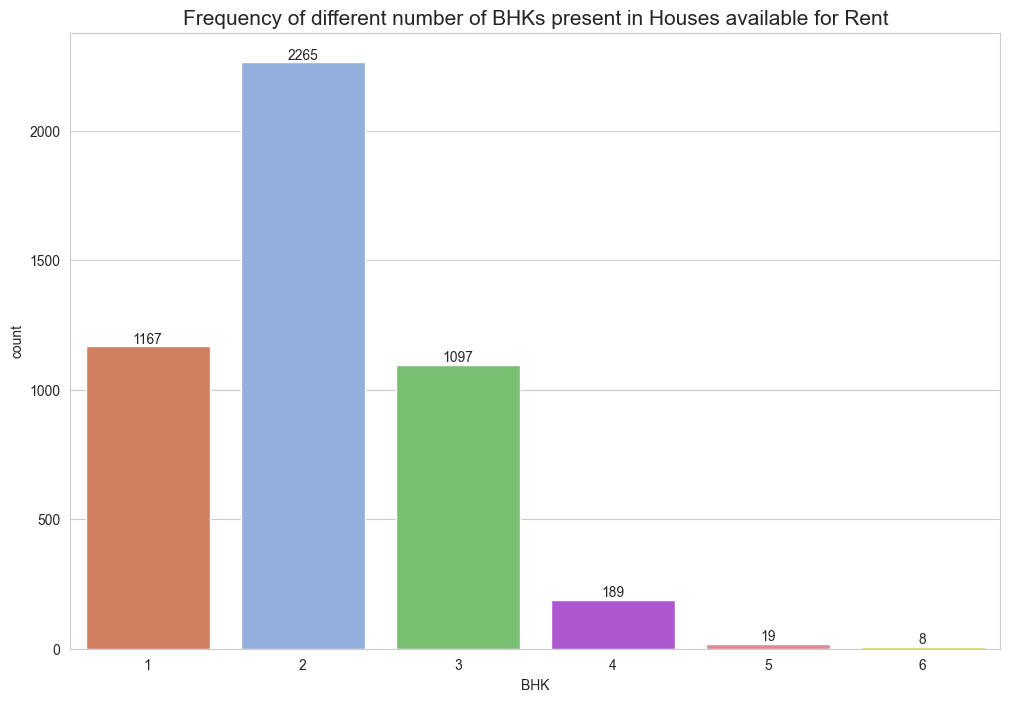

In [1344]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='BHK',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mostly 2 BHK house are rented the most, as it is mostly under budget for the people and can be rented soon.
- 5 and 6 BHK house are put less for rent, because there is very less demand for such big spacious houses in India. 

### Bathroom

In [1345]:
rent_data['Bathroom'].value_counts()

Bathroom
2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

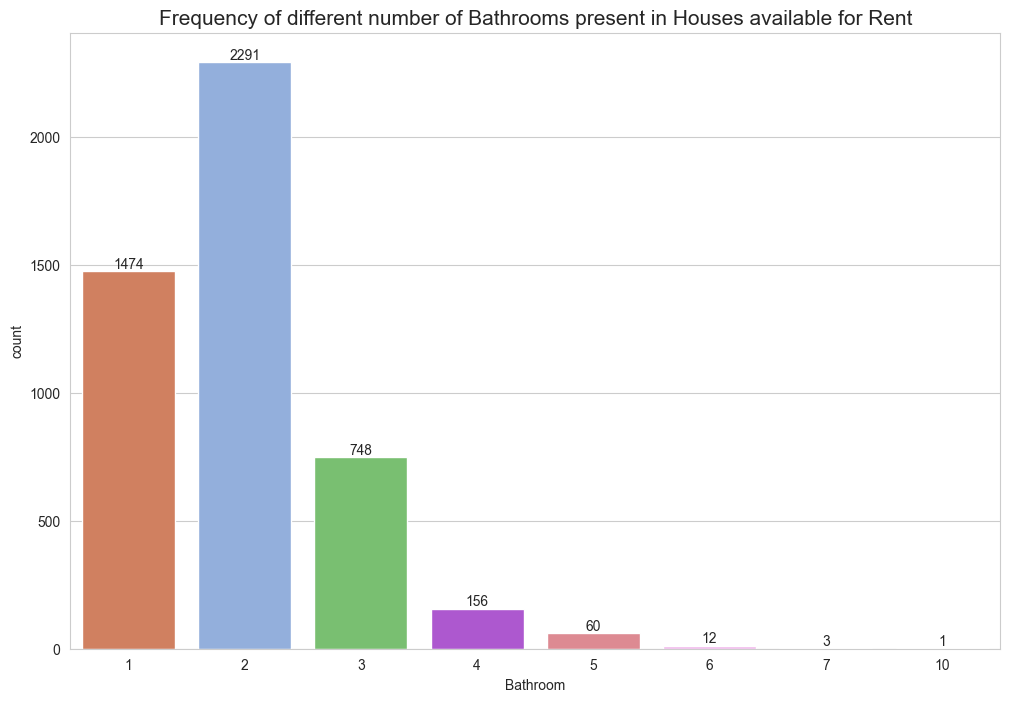

In [1346]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='Bathroom', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- House with 2 Bathrooms are most common for the houses put up on rent.
- Houses with 7 and 10 bathroom quite seems inappropriate and not much of use.

### City

In [1347]:
rent_data['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

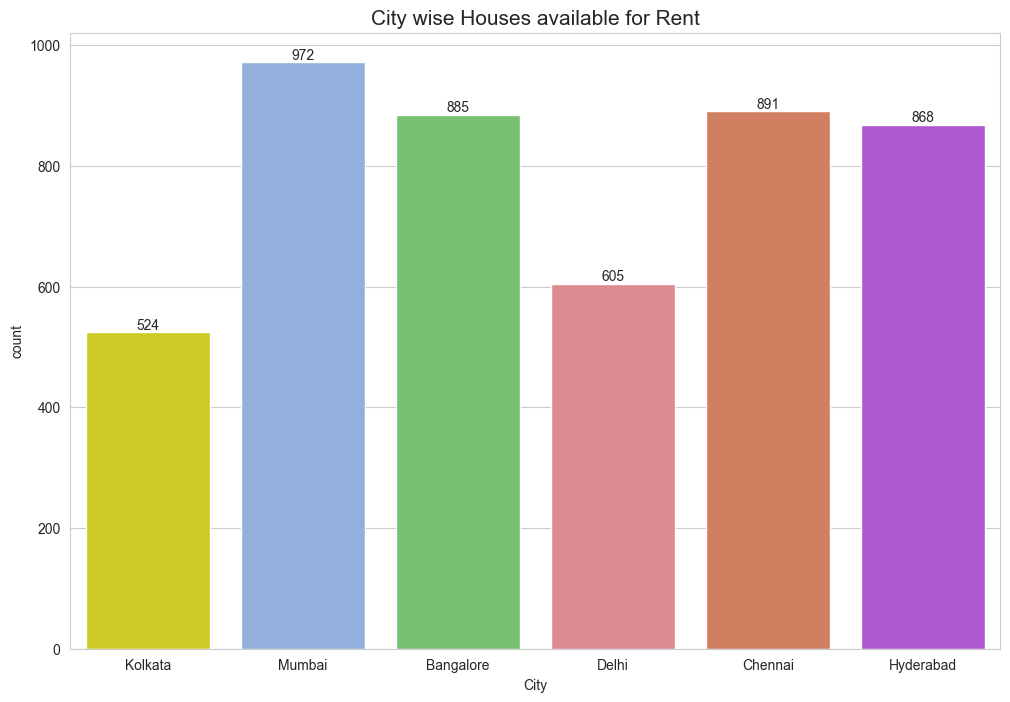

In [1348]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=rent_data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mumbai, followed by Chennai and Hyderad has most number of rented houses, seems like there is very high demand considering the job corporates and other factors.

### Area Type

In [1349]:
rent_data['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2297
Built Area        2
Name: count, dtype: int64

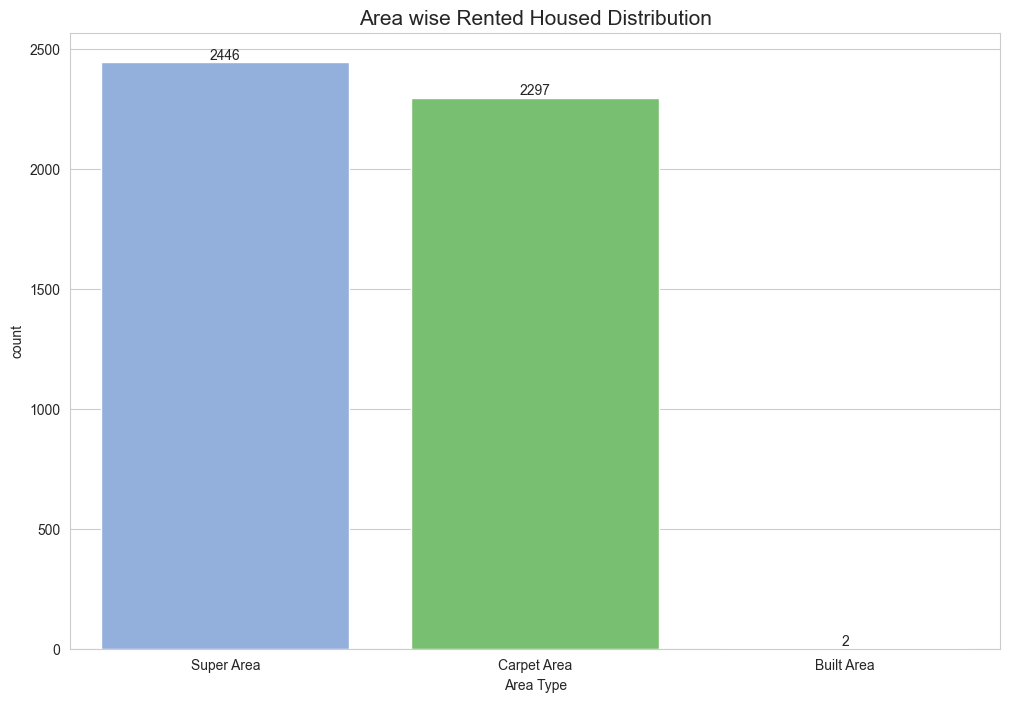

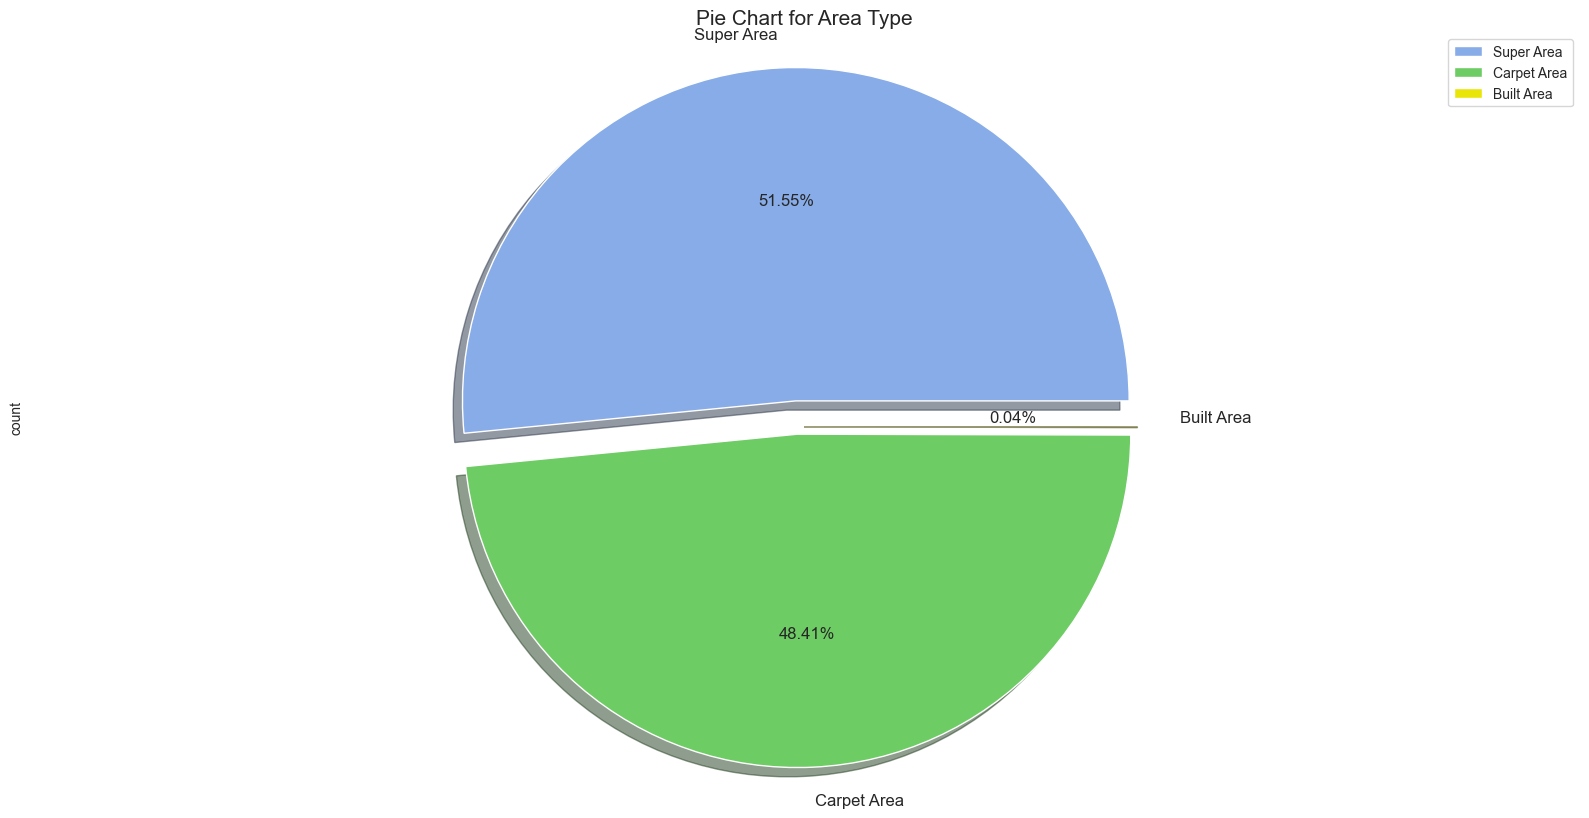

In [1350]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()


#### Observations:
- Super area houses are more put up on rent.
- Built Area wise rented houses are very less.

### Point of Contact

In [1351]:
rent_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: count, dtype: int64

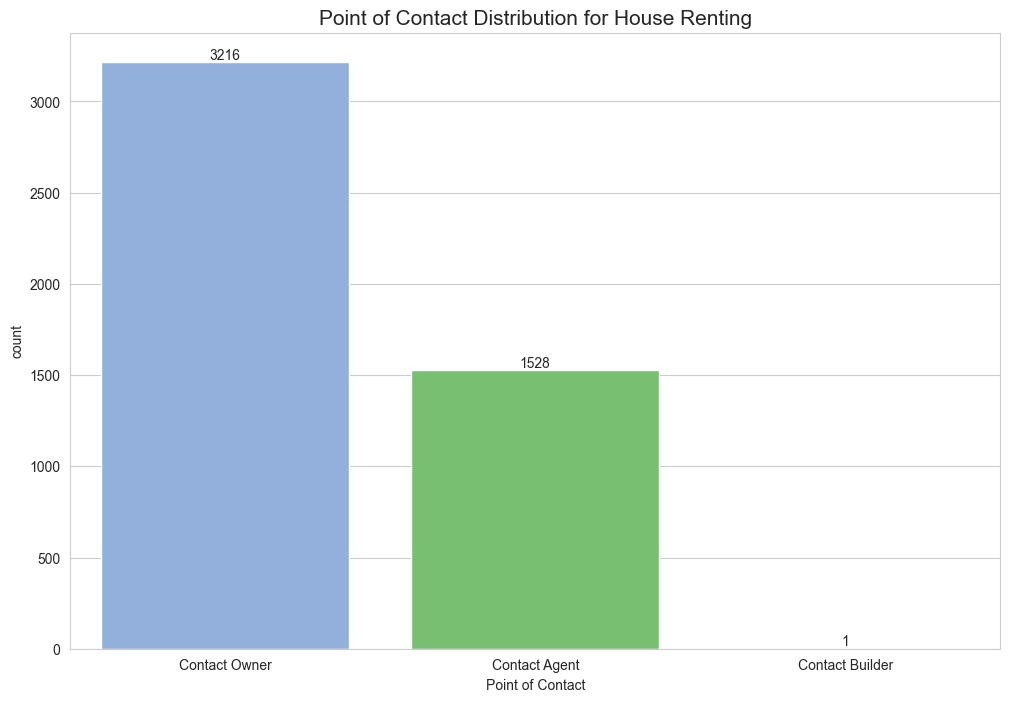

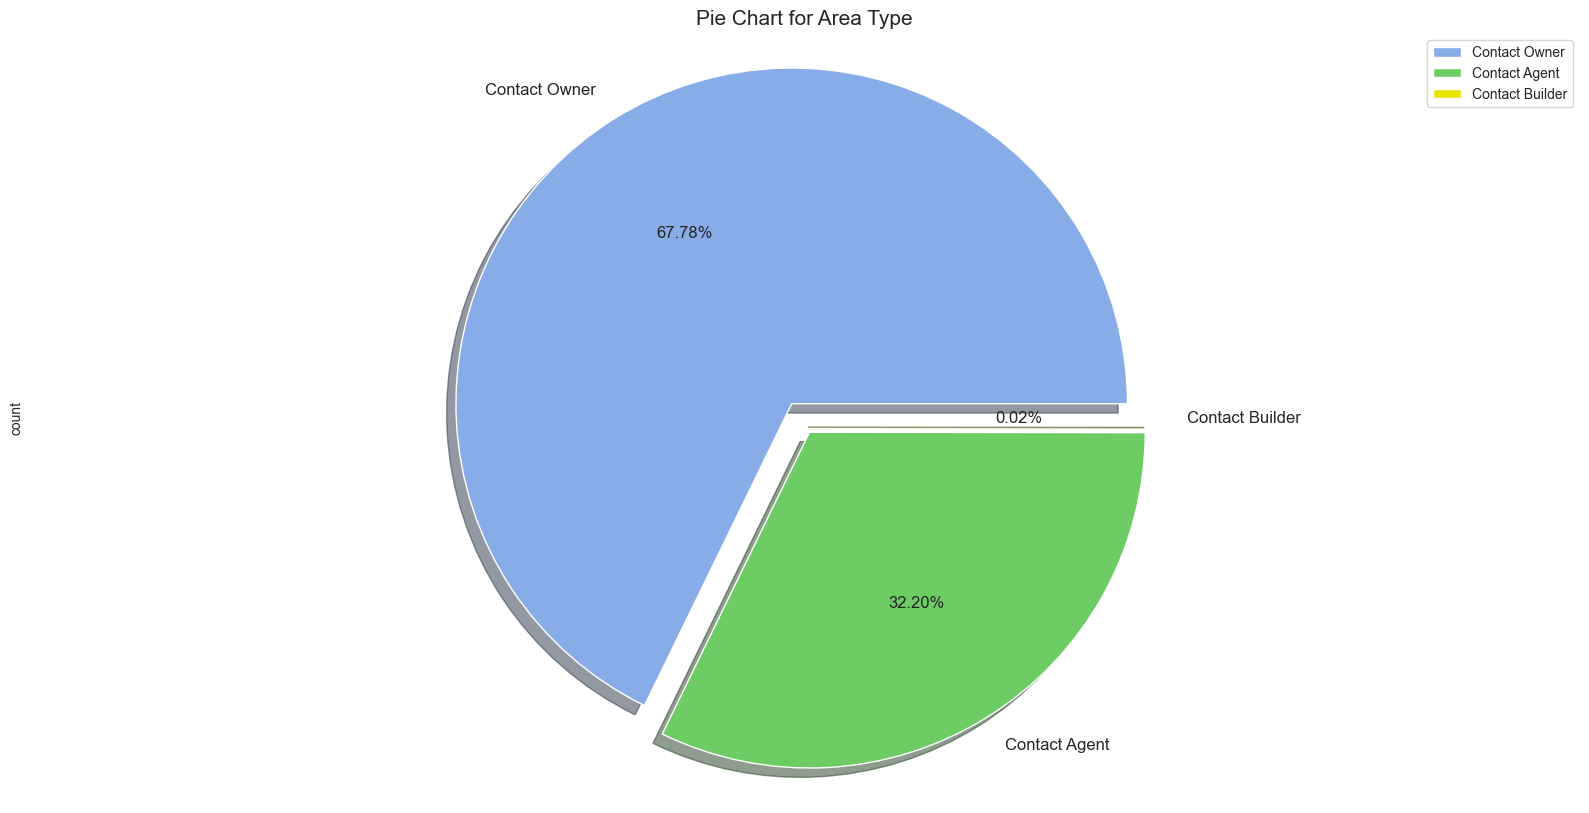

In [1352]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Contact wise most have put the contact of owner only, as it directly more helps with negotiation and verification.

### Tenant Preferred

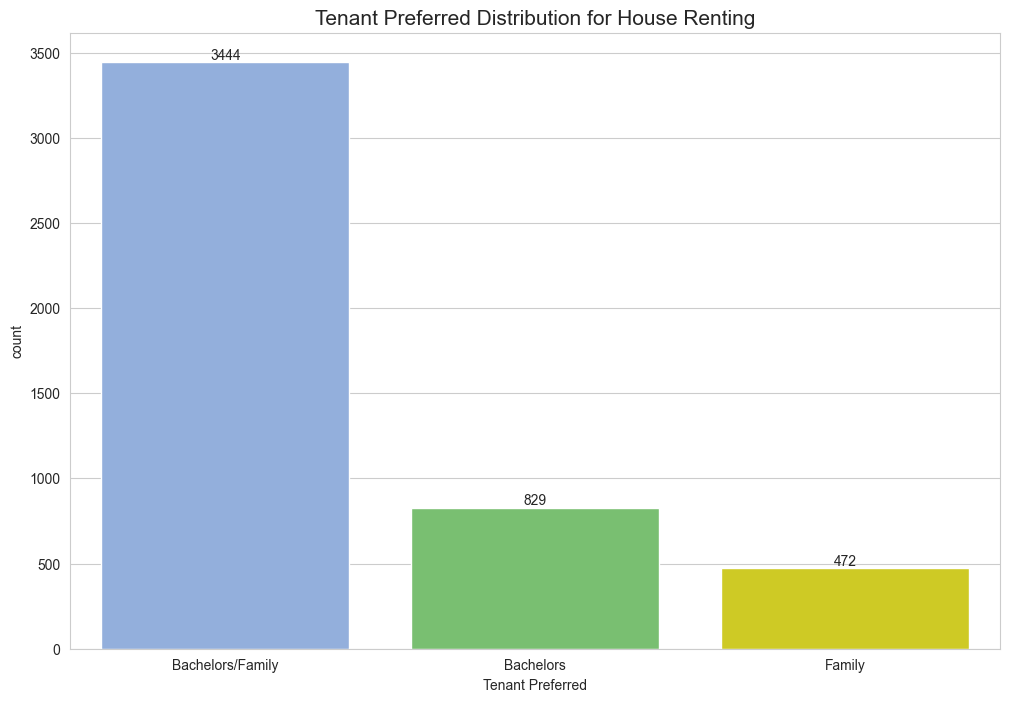

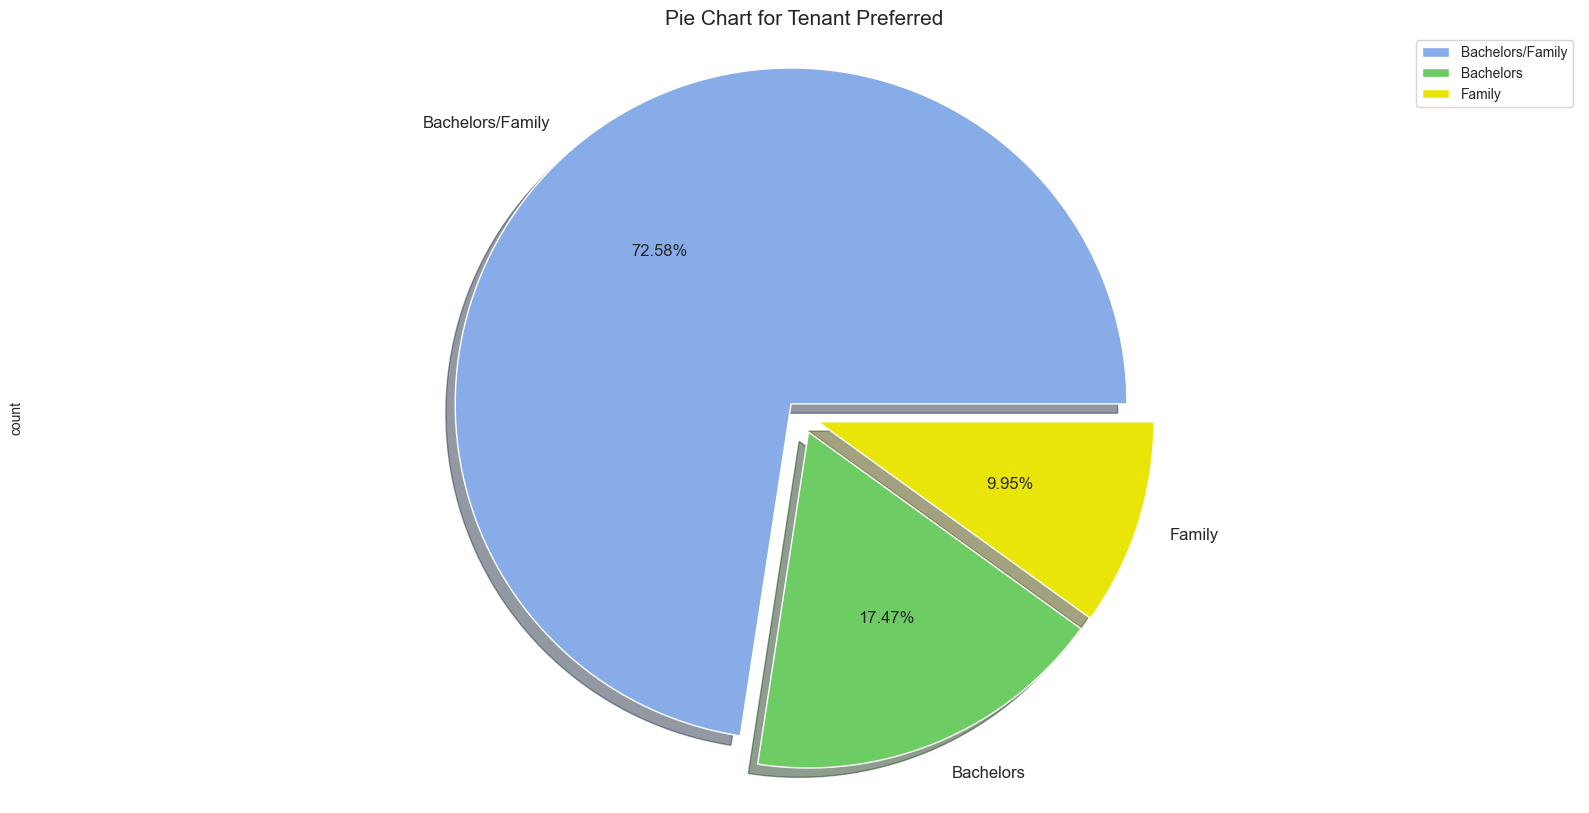

In [1353]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- It seems most rented houses have no special category. They are okay with both Bachelors and Family.

### Furnishing Status

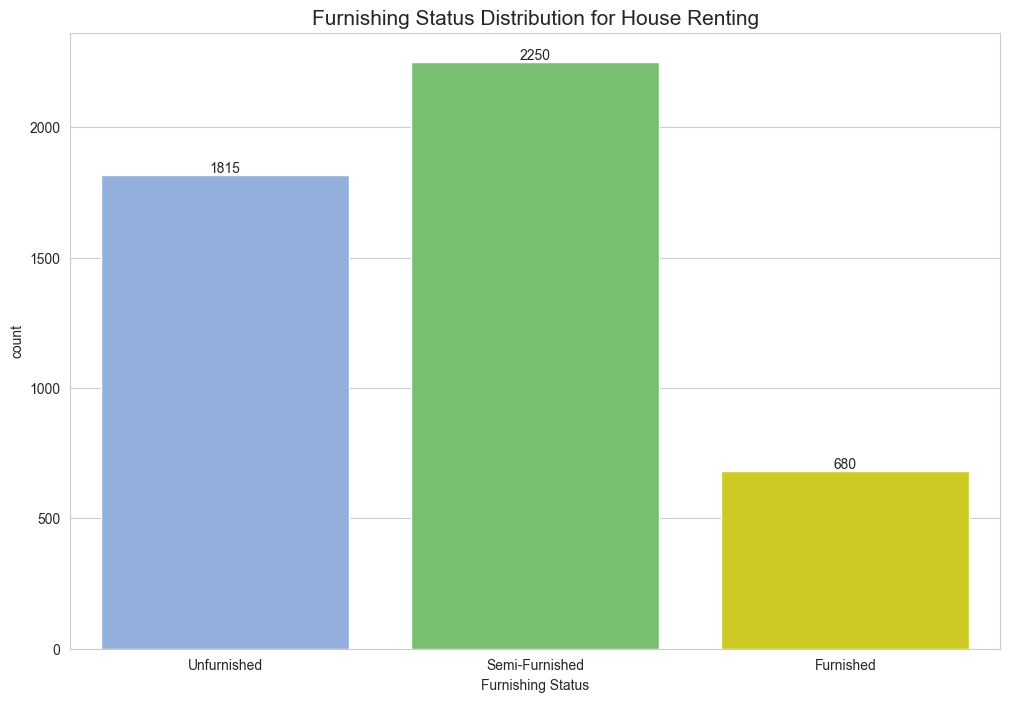

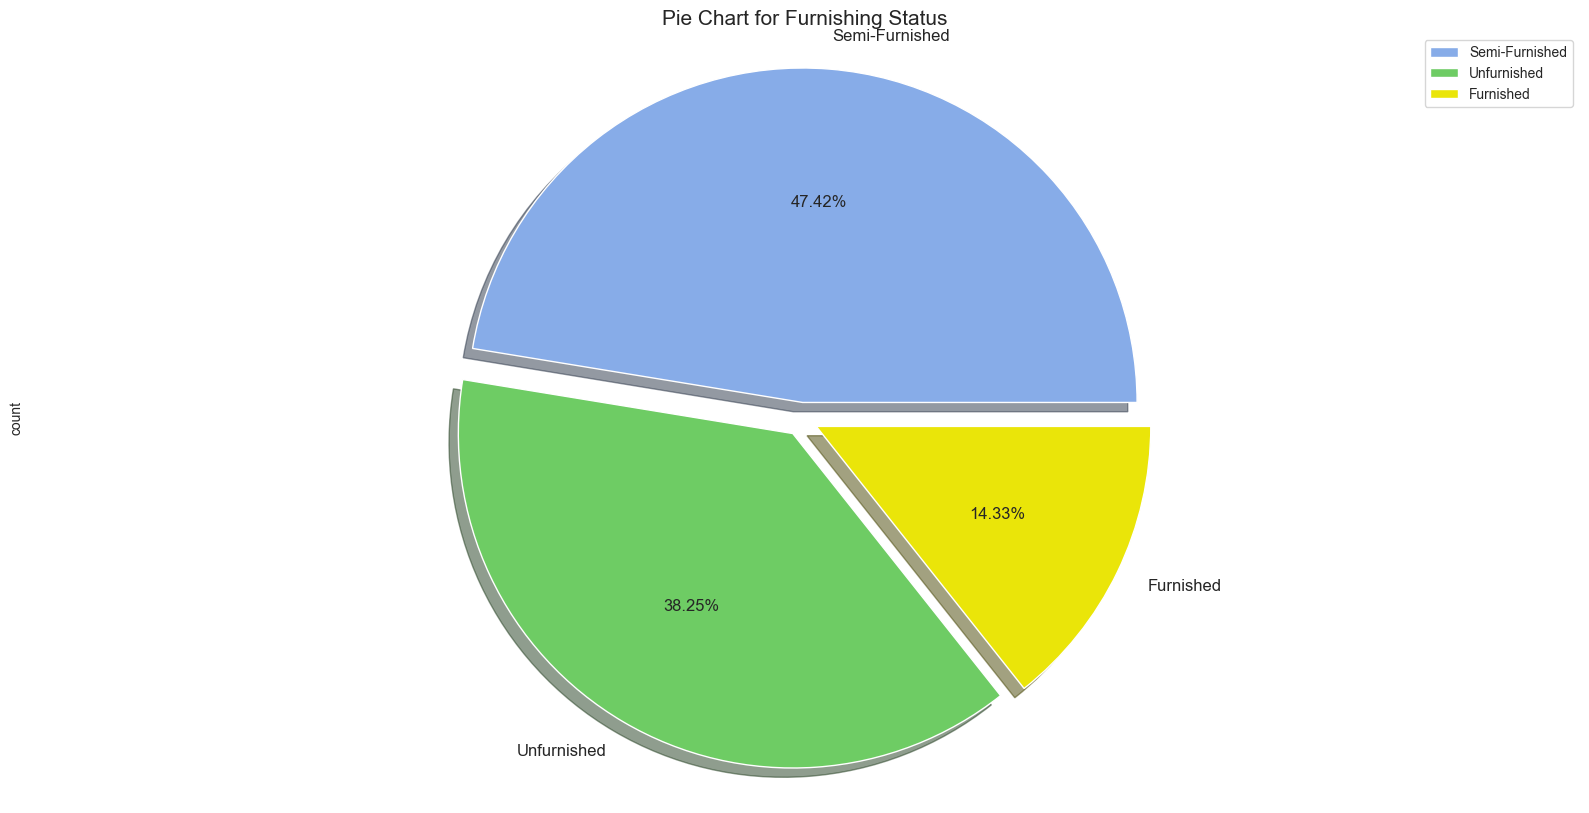

In [1354]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Most Rented Houses are semi-furnished.
- Also cost wise these houses will be quite good to stay and pocket friendly.

## Size

In [1355]:
fig = px.histogram(rent_data, x="Size", title='Size Distribution')
fig.show()
fig = px.box(rent_data, x="Size", title='Boxplot for Size')
fig.show()

#### Observations:
- The smallest house rented has size of about 10 sq. feet.
- The biggest house rented has size of about 8000 sq. feet.
- The median of house rented has size of about 850 sq. feet.

### BHK and Rent distribution

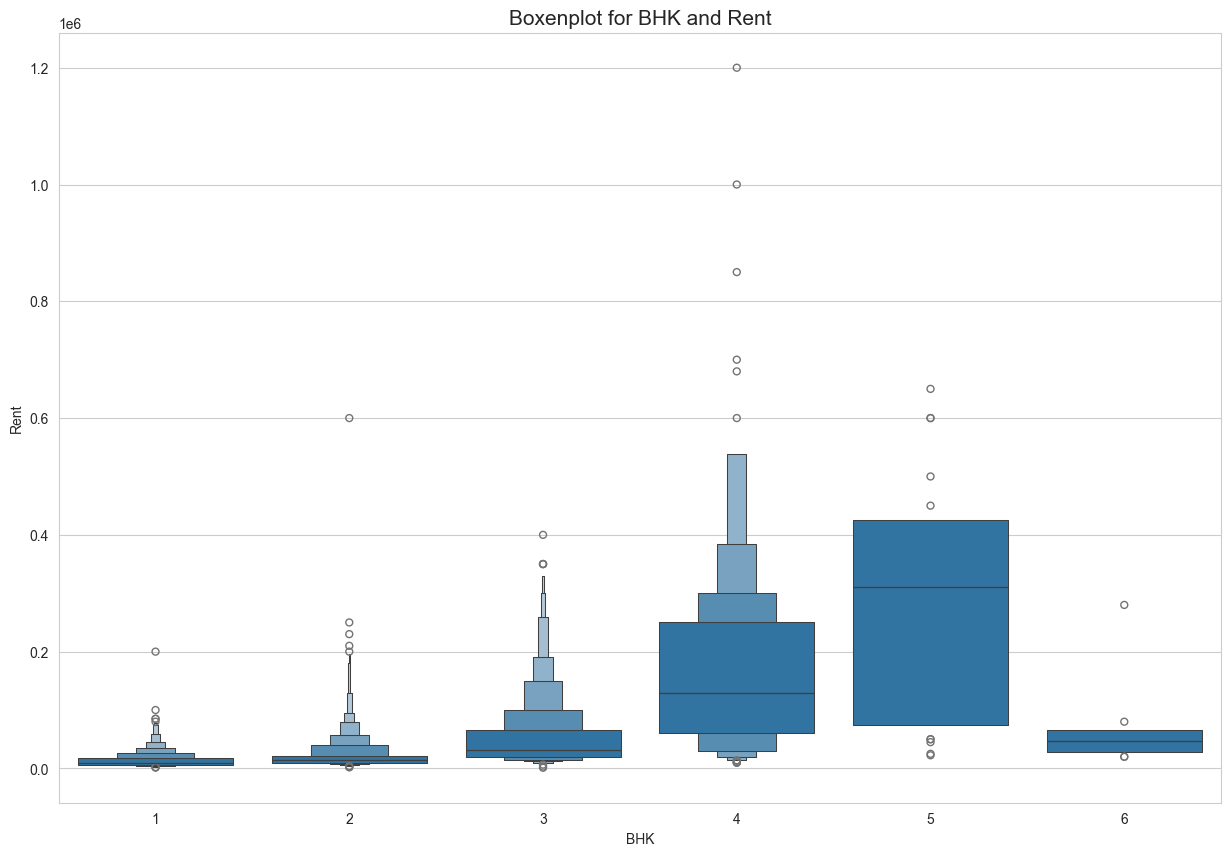

In [1356]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=rent_data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

#### Obseervations:
- The rent of the houses is subsequently increasing with increase in BHK.
- For 6 BHK, things doesn't seem feasible and they are less in demand so rent is very less.

### Bathroom and Rent distribution

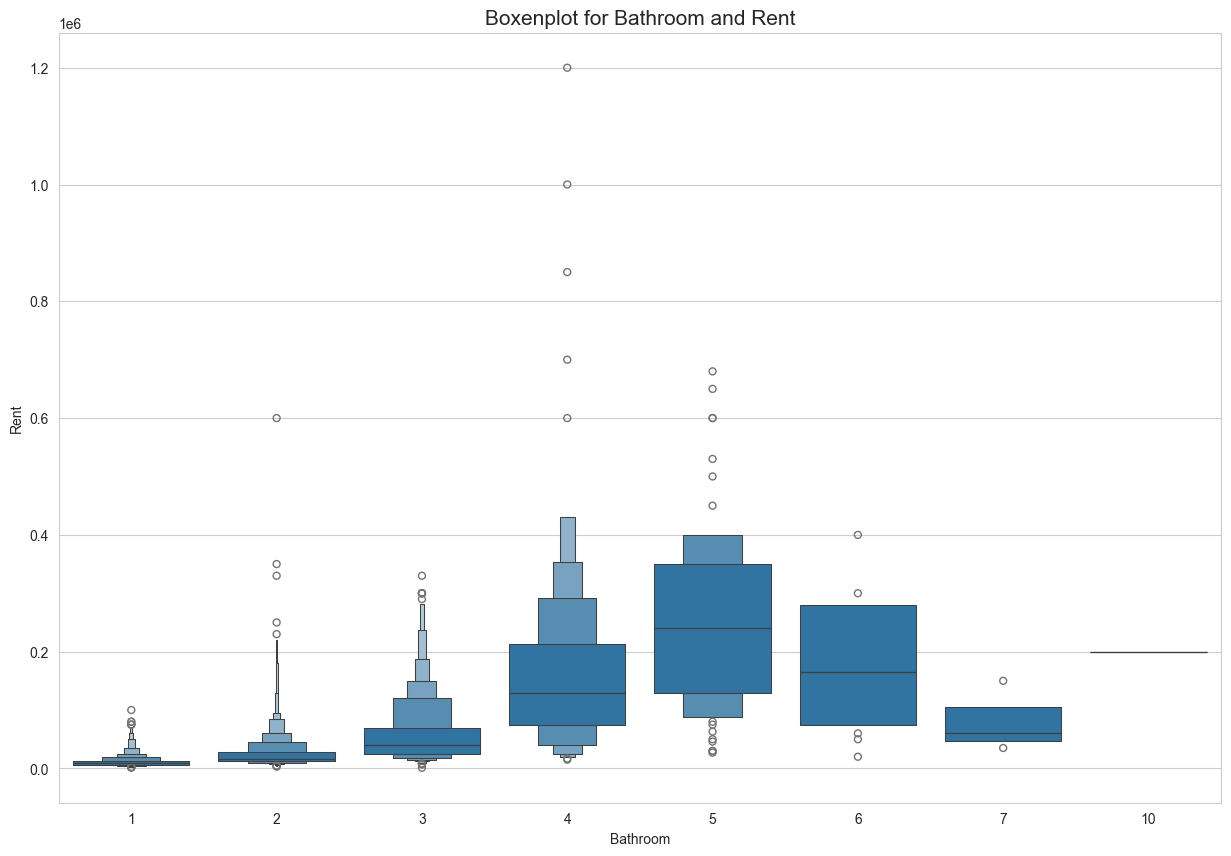

In [1357]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=rent_data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

#### Observations:
- The House rent is increasing with increase in bathrooms in house.
- But having more than 4-5 bathrooms in a house doesn't seem good or feasible, so they are less in demand and that's why there rent is less.

### Area Type and Rent Distribution

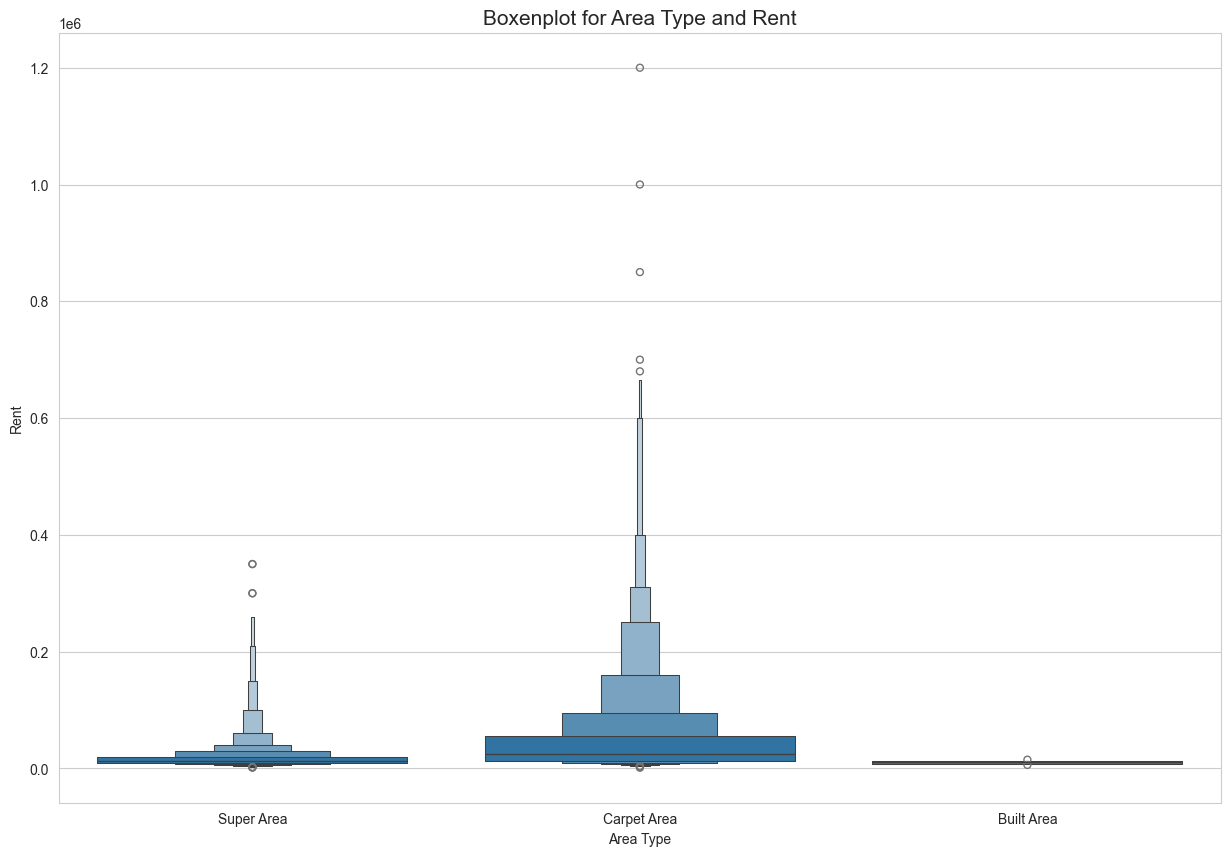

In [1358]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=rent_data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses with Carpet Area have more rent as compared to Super Area.
- Built Area are less in demand , so rent is kept less.

### City and Rent Distribution

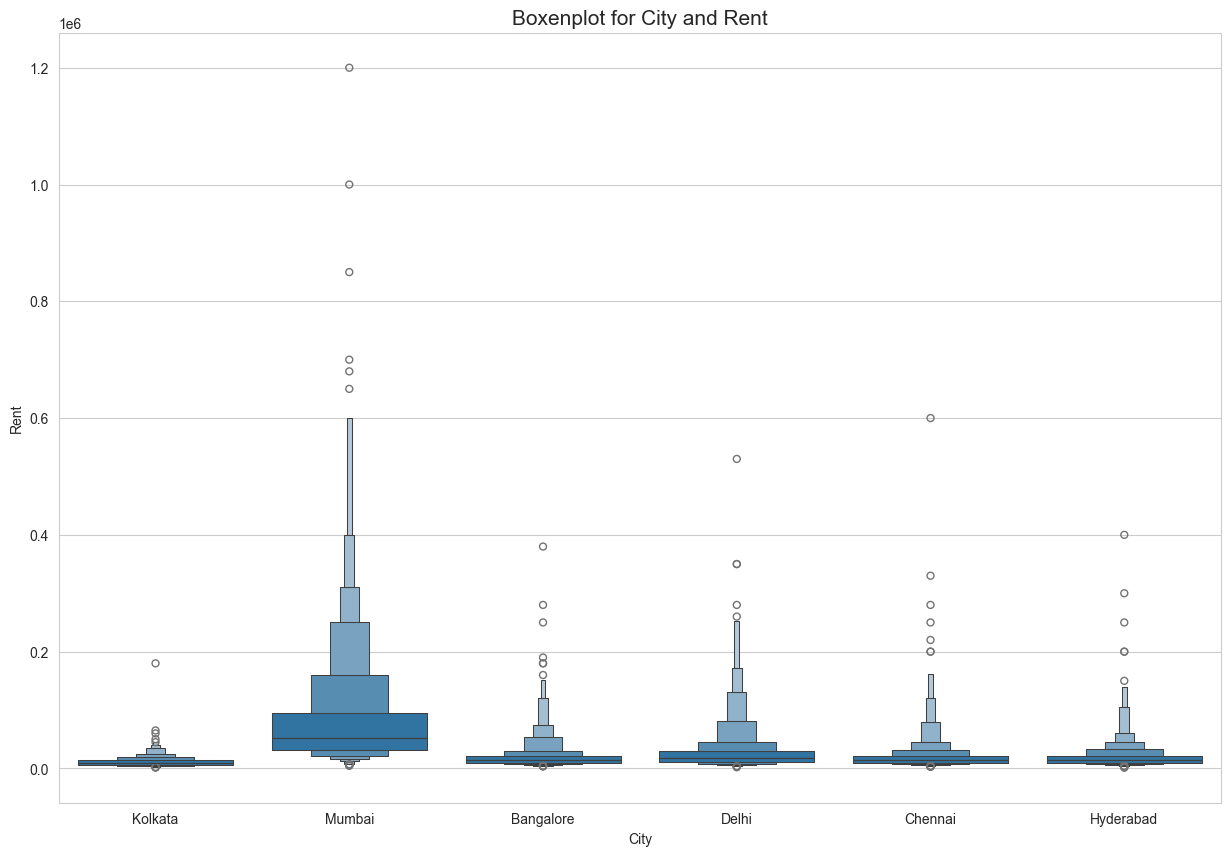

In [1359]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y='Rent',data=rent_data)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

### Furnishing Status and Rent Distribution

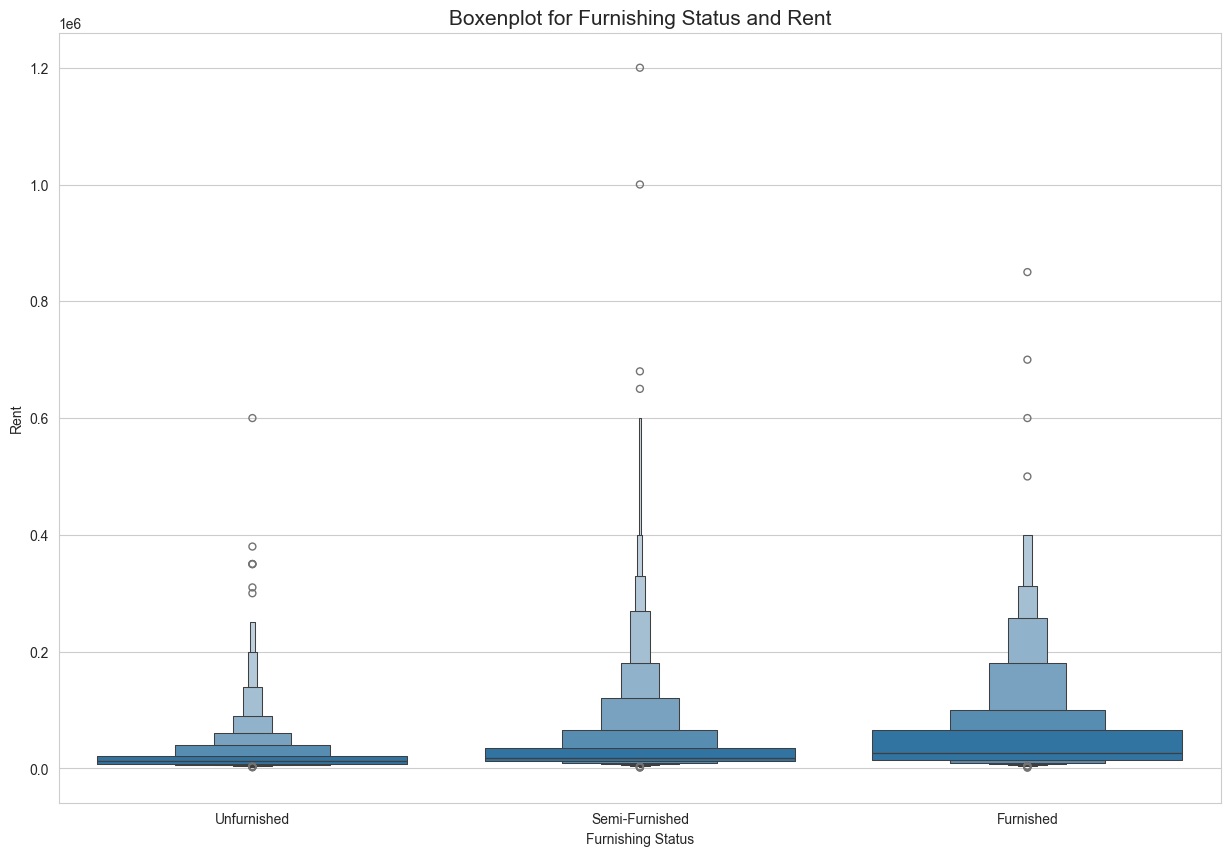

In [1360]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=rent_data)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

#### Observations:
- Unfurnished houses for rent are having less rent as compared to others.

### Tenant Preferred and Rent Distribution

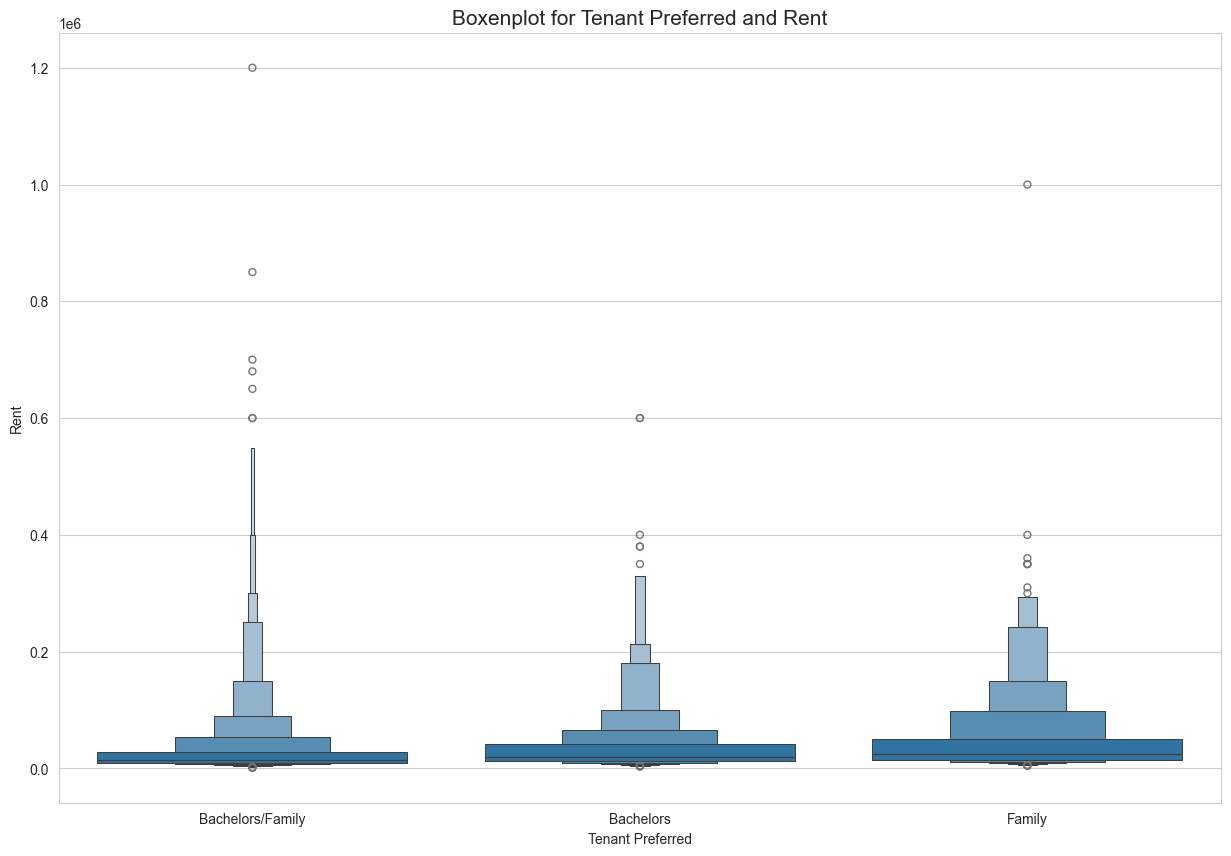

In [1361]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=rent_data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses rented with no tenant conditions are having a bit more rent as compared to others.

### Point of Contact and Rent Distribution

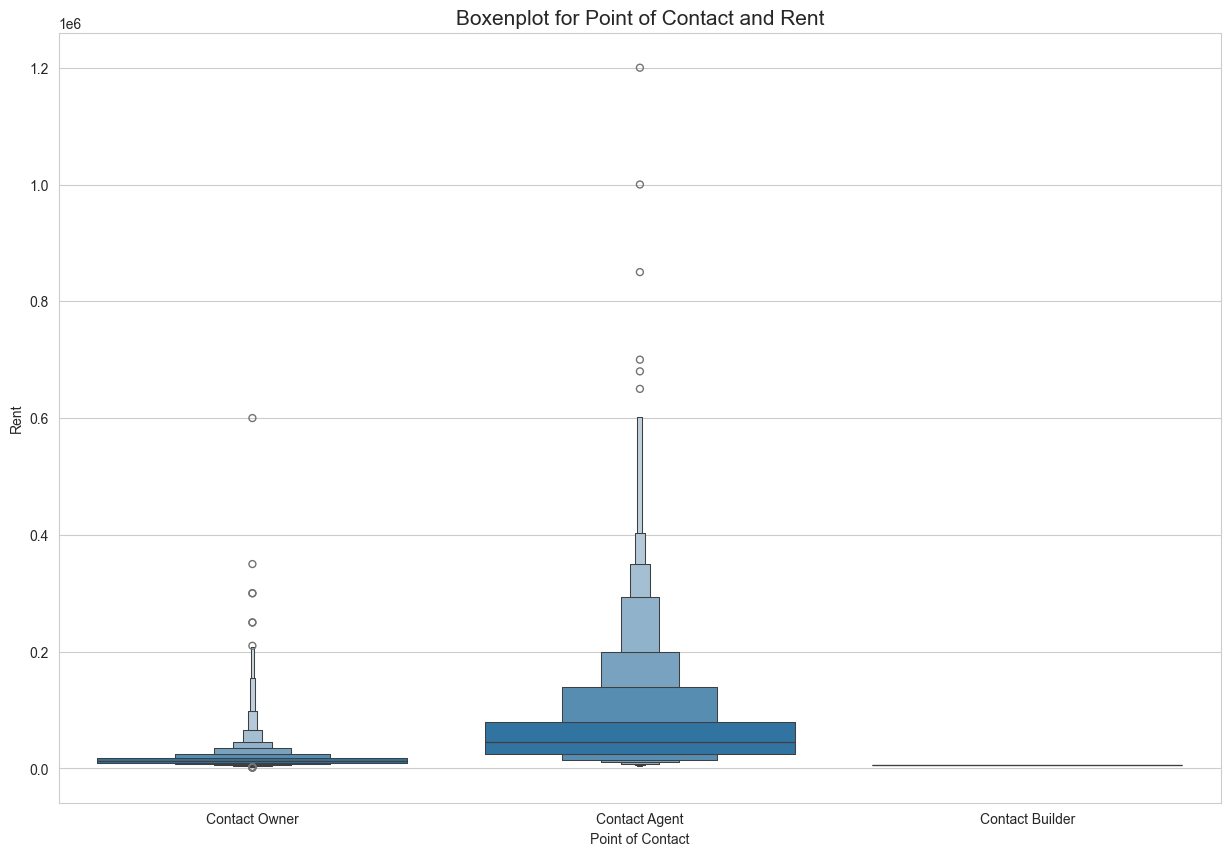

In [1362]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=rent_data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

#### Observations:
- As having a contact agent to get you a house rented also involves paying him/her. So this could be one of the reason that rent for Contact Agent pount of contact is bit high to compensate that.
- Directly contacting Builder involves less rent.

### Sunburst Chart

In [1363]:
fig = px.sunburst(rent_data, path=['City','Area Type', 'Furnishing Status', 'Tenant Preferred'], width=900,
    height=900,title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

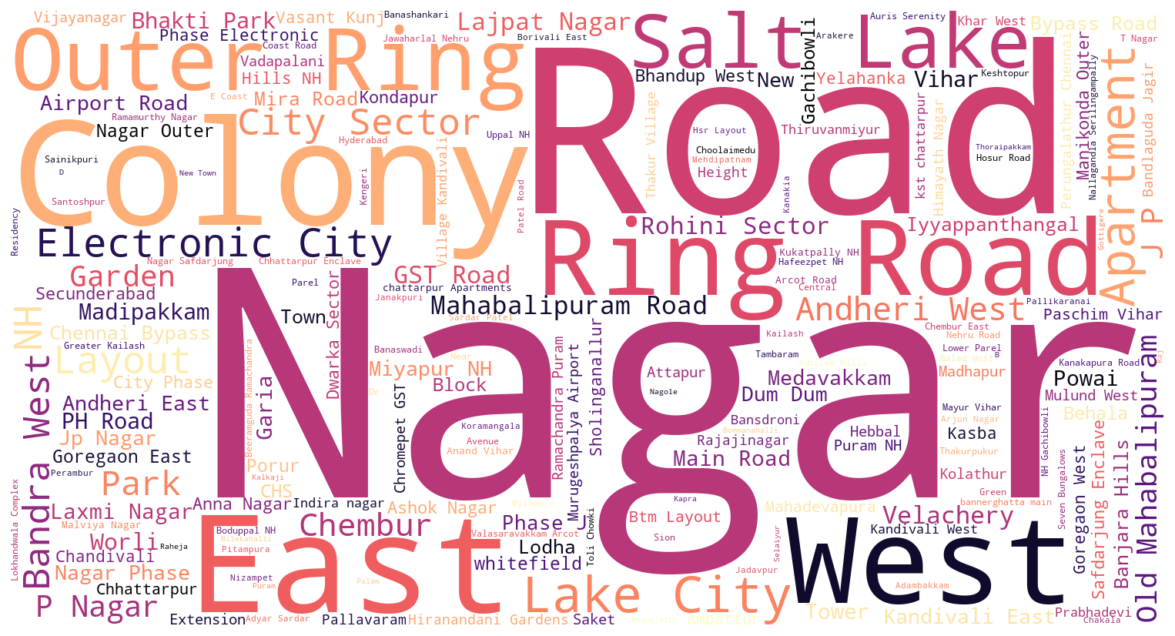

In [1364]:
text = " ".join(area for area in rent_data["Area Locality"])
wordcloud = WordCloud(background_color="white", 
                      max_words=200,
                      width=1500, 
                      height=800,
                      colormap="magma" ).generate(text)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Heatmap of Correlation

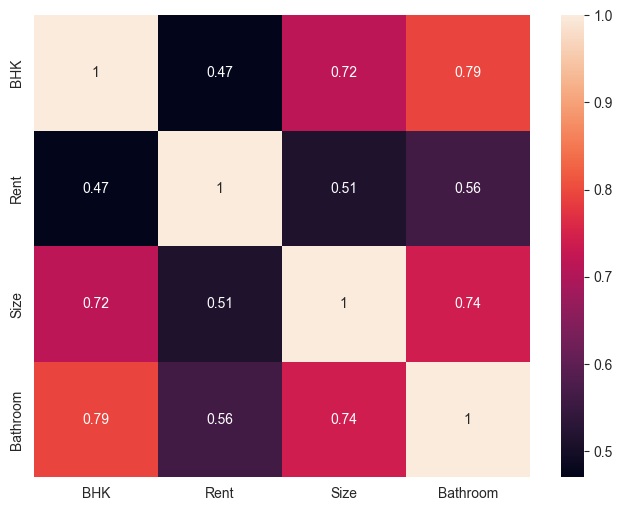

In [1365]:
numeric_data = rent_data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1, square = False, annot=True)
plt.show()

In [1366]:
num_area_localities = rent_data['Area Locality'].nunique()
print(f"There are {num_area_localities} unique types of area localities in the dataset.")

There are 2235 unique types of area localities in the dataset.


In [1367]:
print(rent_data['Floor'])
num_unique_floors = rent_data['Floor'].nunique()
print(f"There are {num_unique_floors} unique types of floors in the dataset.")

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4745, dtype: object
There are 480 unique types of floors in the dataset.


In [1368]:
## Dropping unnecessary columns from dataset
columns_to_drop = ['Posted On', 'Area Locality', 'Floor','Tenant Preferred','Point of Contact']
existing_columns_to_drop = [col for col in columns_to_drop if col in rent_data.columns]
rent_data = rent_data.drop(existing_columns_to_drop, axis=1)
rent_data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1


In [1369]:
rent_data = pd.get_dummies(rent_data, columns=['Area Type', 'City', 'Furnishing Status', ])
rent_data = rent_data.astype(int)
rent_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2,10000,1100,2,0,0,1,0,0,0,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,1,0,0,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,1,0,0,0,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,0,1,0,0,0,1


In [1370]:
print(rent_data.isnull().sum())  # Check for missing values


BHK                                 0
Rent                                0
Size                                0
Bathroom                            0
Area Type_Built Area                0
Area Type_Carpet Area               0
Area Type_Super Area                0
City_Bangalore                      0
City_Chennai                        0
City_Delhi                          0
City_Hyderabad                      0
City_Kolkata                        0
City_Mumbai                         0
Furnishing Status_Furnished         0
Furnishing Status_Semi-Furnished    0
Furnishing Status_Unfurnished       0
dtype: int64


In [1371]:
#numerical_cols = ['Size', 'Rent', 'Bathroom', 'BHK']  # Add or remove columns as necessary


In [1372]:
rent_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2,10000,1100,2,0,0,1,0,0,0,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,1,0,0,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,1,0,0,0,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,0,1,0,0,0,1


In [1373]:
print(rent_data.dtypes)

BHK                                 int64
Rent                                int64
Size                                int64
Bathroom                            int64
Area Type_Built Area                int64
Area Type_Carpet Area               int64
Area Type_Super Area                int64
City_Bangalore                      int64
City_Chennai                        int64
City_Delhi                          int64
City_Hyderabad                      int64
City_Kolkata                        int64
City_Mumbai                         int64
Furnishing Status_Furnished         int64
Furnishing Status_Semi-Furnished    int64
Furnishing Status_Unfurnished       int64
dtype: object


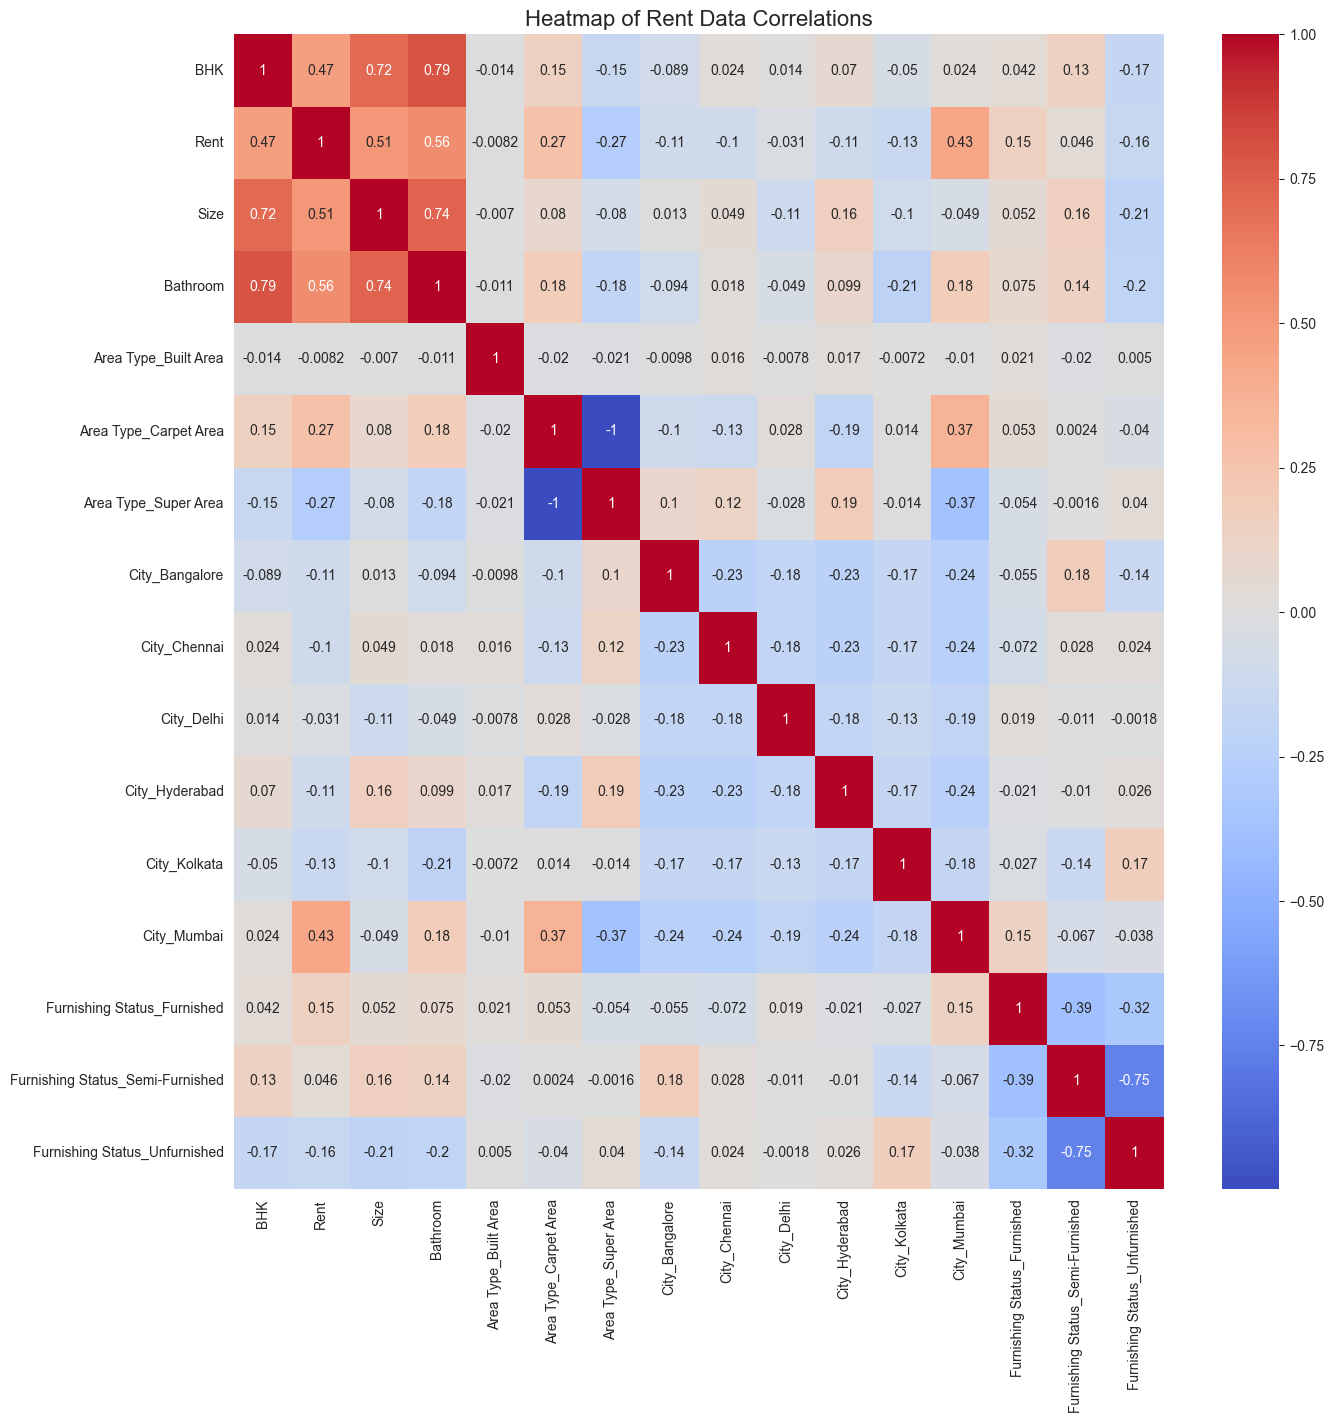

In [1374]:
corr = rent_data.corr()

# Plot the heatmap
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=False, annot=True, cmap="coolwarm")
plt.title("Heatmap of Rent Data Correlations", size=16)
plt.show()

In [1375]:
correlation_matrix = rent_data.corr()
print(correlation_matrix['Rent'].sort_values(ascending=False))


Rent                                1.000000
Bathroom                            0.562577
Size                                0.511398
BHK                                 0.469925
City_Mumbai                         0.433743
Area Type_Carpet Area               0.269483
Furnishing Status_Furnished         0.149554
Furnishing Status_Semi-Furnished    0.046367
Area Type_Built Area               -0.008167
City_Delhi                         -0.030719
City_Chennai                       -0.101794
City_Bangalore                     -0.105975
City_Hyderabad                     -0.108560
City_Kolkata                       -0.133380
Furnishing Status_Unfurnished      -0.155462
Area Type_Super Area               -0.269140
Name: Rent, dtype: float64


# Modeling

In [1376]:
X = rent_data.drop('Rent',axis=1)
y = rent_data['Rent']

## Splitting into Train and Test dataset

In [1377]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [1378]:
from sklearn.tree import DecisionTreeRegressor # type: ignore
from sklearn.metrics import r2_score, mean_absolute_error

# Create and train a Decision Tree mode
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model

dt_mse = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))   
print("Decision Tree MSE:", metrics.mean_squared_error(y_test, y_pred_dt))


Decision Tree R2 Score: 0.5542876920322976
Decision Tree MAE: 14928.897449421675
Decision Tree MSE: 1581935952.9826834


In [1379]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", metrics.mean_squared_error(y_test, y_pred_dt))


Random Forest R2 Score: 0.6806975397769306
Random Forest MAE: 12868.964165317282
Random Forest MSE: 1581935952.9826834


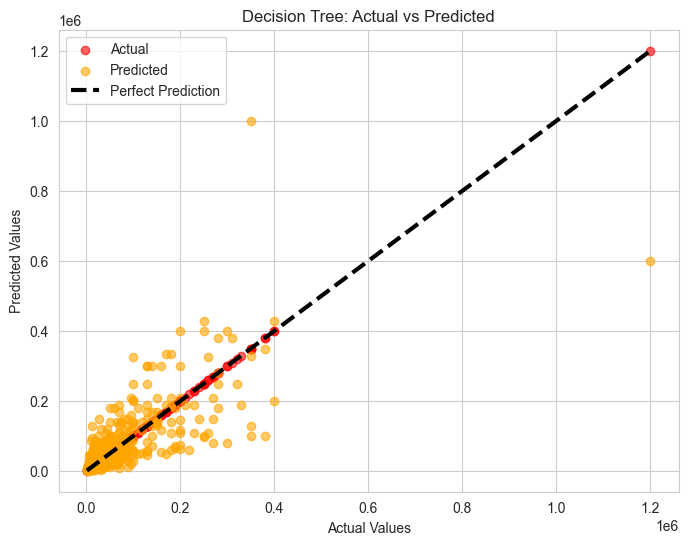

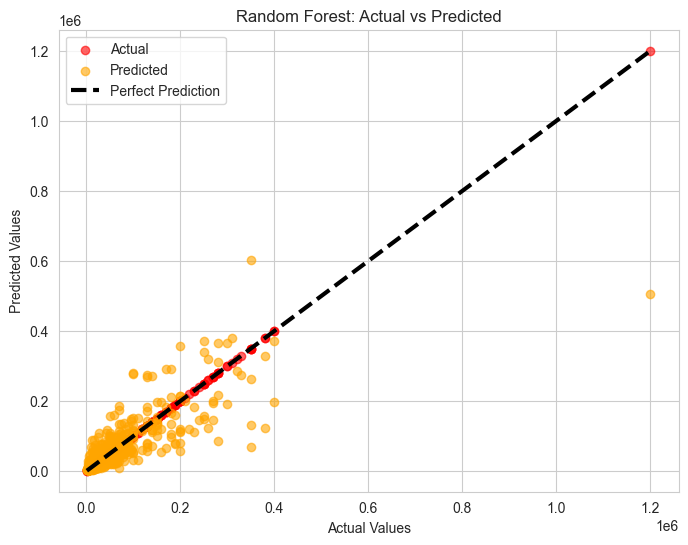

In [1380]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    
    # Plot actual values in red
    plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.6)
    
    # Plot predicted values in orange
    plt.scatter(y_test, y_pred, color='orange', label='Predicted', alpha=0.6)
    
    # Add a line for perfect prediction (where actual equals predicted)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, label='Perfect Prediction')  # 'k--' for a black dashed line
    
    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Decision Tree
plot_actual_vs_predicted(y_test, y_pred_dt, "Decision Tree: Actual vs Predicted")

# Plot for Random Forest
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest: Actual vs Predicted")


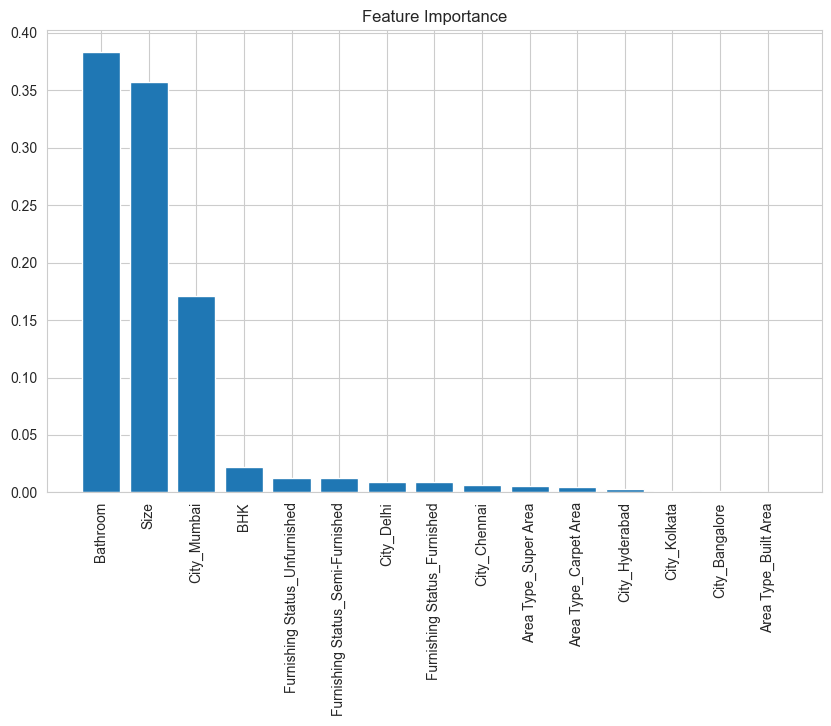

In [1381]:
import matplotlib.pyplot as plt

# Get feature importances from the random forest model 
importances = rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [1382]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define the hyperparameter grid for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform randomized search for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, 
                                      n_iter=200, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to the data
rf_random_search.fit(X_train, y_train)

# Get the best estimator from Random Forest
best_rf = rf_random_search.best_estimator_

# Predict using the best estimator
rf_y_pred = best_rf.predict(X_test)

# Evaluate the tuned Random Forest model
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Print evaluation metrics for Random Forest
print("Random Forest After Tuning")
print("--------------------------")
print(f"R²: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")

# Define the hyperparameter grid for Decision Tree
dt_param_dist = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}

# Initialize Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Perform randomized search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_dist, 
                                      n_iter=200, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to the data
dt_random_search.fit(X_train, y_train)

# Get the best estimator from Decision Tree
best_dt = dt_random_search.best_estimator_

# Predict using the best estimator
dt_y_pred = best_dt.predict(X_test)

# Evaluate the tuned Decision Tree model
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)

# Print evaluation metrics for Decision Tree
print("\nDecision Tree After Tuning")
print("--------------------------")
print(f"R²: {dt_r2:.4f}")
print(f"MAE: {dt_mae:.4f}")
print(f"MSE: {dt_mse:.4f}")



Fitting 3 folds for each of 200 candidates, totalling 600 fits
Random Forest After Tuning
--------------------------
R²: 0.7138
MAE: 12372.7880
MSE: 1015777644.5600
Fitting 3 folds for each of 200 candidates, totalling 600 fits

Decision Tree After Tuning
--------------------------
R²: 0.6003
MAE: 13085.9895
MSE: 1418751499.5548


In [1383]:
print("\nDecision Tree - Before Tuning:")
print(f"Decision Tree R2 Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MSE: {metrics.mean_squared_error(y_test, y_pred_dt):.4f}")


print("\nDecision Tree - After Tuning:")
print(f"Decision Tree R²: {dt_r2:.4f}")
print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Decision Tree MAE: {dt_mae:.4f}")

print("\nRandom Forest - Before Tuning:")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"Random Forest MSE: {metrics.mean_squared_error(y_test, y_pred_dt):.4f}")

print("\nRandom Forest - After Tuning:")
print(f"Random Forest R²: {rf_r2:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")



Decision Tree - Before Tuning:
Decision Tree R2 Score: 0.5543
Decision Tree MAE: 14928.8974
Decision Tree MSE: 1581935952.9827

Decision Tree - After Tuning:
Decision Tree R²: 0.6003
Decision Tree MSE: 1418751499.5548
Decision Tree MAE: 13085.9895

Random Forest - Before Tuning:
Random Forest R2 Score: 0.6807
Random Forest MAE: 12868.9642
Random Forest MSE: 1581935952.9827

Random Forest - After Tuning:
Random Forest R²: 0.7138
Random Forest MSE: 1015777644.5600
Random Forest MAE: 12372.7880


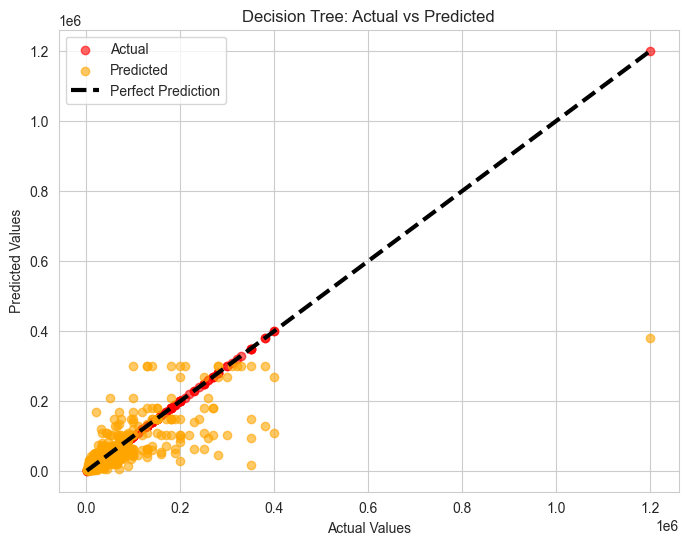

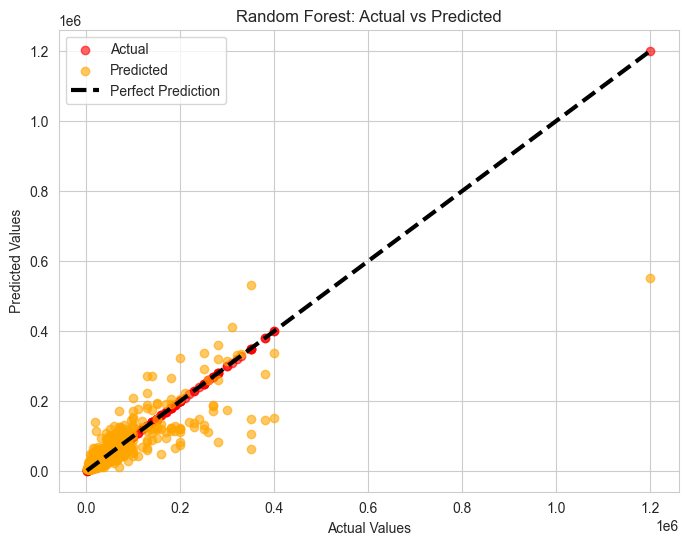

In [1384]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    
    # Plot actual values in red
    plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.6)
    
    # Plot predicted values in orange
    plt.scatter(y_test, y_pred, color='orange', label='Predicted', alpha=0.6)
    
    # Add a line for perfect prediction (where actual equals predicted)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, label='Perfect Prediction')  # 'k--' for a black dashed line
    
    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Decision Tree
plot_actual_vs_predicted(y_test, dt_y_pred, "Decision Tree: Actual vs Predicted")

# Plot for Random Forest
plot_actual_vs_predicted(y_test, rf_y_pred, "Random Forest: Actual vs Predicted")
